In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random                          # crear numeros aleatoriamente
import scipy.io as sio
from sklearn.model_selection import train_test_split


In [2]:
# cargar el archivo .mat
data = sio.loadmat('Tiosulfatosodio.mat')

#Extrayendo matriz de caracteristicas 
Xi = data['x']

#Extrayendo dato esperado (Clases)
Yi = data['y']

#Agregando el bias a las filas de la matriz de caracteristicas (Entradas)
bias = np.full((Xi.shape[0], 1), 1)
Xi = np.hstack((bias, Xi))

#numero de datos
num_datos = Xi.shape[0]

#numero de caracteristicas
caract = Xi.shape[1]-1                  # Se resta el bias 

#Obteniendo datos de entrenamiento y prueba
D_entre = int(num_datos*0.9)        # datos de entrenamiento   (verificar la cantidad de dtos para hacer la particion)
D_prueba = int(num_datos*0.1)            # datos de prueba

# Particion de datos
#X_ent = Xi[0:D_entre,:]                       # Datos de entrenamiento (caracteristicas)
#Y_ent = Yi[0:D_entre,:]  

#Particion datos prueba 
#X_pru = Xi[D_entre:D_entre+D_prueba,:]               # Datos de prueba (caracteristicas)
#Y_pru = Yi[D_entre:D_entre+D_prueba,:]

#Definicion de errores
Err_entr = 10;
Err_pru = 10;

X_ent, X_pru, Y_ent, Y_pru = train_test_split(Xi, Yi, test_size=0.1)



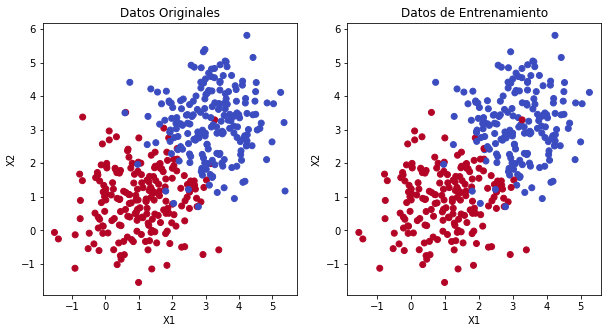

In [3]:
import matplotlib.pyplot as plt

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Graficar la segunda gráfica en el segundo subplot
ax1.scatter(Xi[:, 1], Xi[:, 2], c=Yi, cmap=plt.cm.coolwarm)
ax1.set_title('Datos Originales')
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")

# Graficar la primera gráfica en el primer subplot
ax2.scatter(X_ent[:, 1], X_ent[:, 2], c=Y_ent, cmap=plt.cm.coolwarm)
ax2.set_title('Datos de Entrenamiento')
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")


# Mostrar la figura
plt.show()


In [4]:
#Definicion de los pesos e inicialización 
Wk = []  
for i in range(Xi.shape[1]):                      # ciclo para agregar los numeros aleatorios con los que se inicializaran los pesos
    Wk.append(random.uniform(0,1))                # vector de pesos extendido
print(Wk)


[0.4215352010328799, 0.35344063195553677, 0.4293936894523076]


In [5]:
error = []
e = 0
N=0
u=0.1
suma=0
iteraciones = 0
Emin = 10
#Eent=  0
print("Wo: ", Wk )

u = 0.1
u_min = 0.01
u_max = 0.3
gamma = 1.05
beta =  1.04
alpha = 0.7
errorP = []
sumap = 0

while(iteraciones<=400):

    ################## Error de entrenamiento  ###########################
    
    i = np.random.randint(0,X_ent.shape[0])#Xi.shape[0])
    print("iteraciones =",iteraciones,"\n")
    Y = Y_ent[i][0]
    g = np.dot(np.transpose(Wk),X_ent[i]) #Funcion interna de la neurona. matmul permite multiplicar dos matrices
    print("g: ", g)
    e = (g - Y)  #Error entre la salida dada y la salida esperada 
    print("error:",e)
    
    if g < -0.01:                   # se establece un umbral para poder hacer clasificacion con el algoritmo LMS
        g = -1
    else:
        g = 1
                
    if g != Y:          # Condicion de Error
        suma = suma + 1          # contador de errores
    
    print("Suma: ", suma)
    Eent = (100*suma)/D_entre
    print("Error entrenamiento: ", Eent)
    error.append(e)
    ########################################################################
    
    print('\n')
    ################# Error de prueba  ###############################
    
    ip = np.random.randint(0,X_pru.shape[0])#Xi.shape[0])
    Yp = Y_pru[ip][0]
    gp = np.dot(np.transpose(Wk),X_pru[ip]) #Funcion interna de la neurona. matmul permite multiplicar dos matrices
    print("gp: ", gp)
    ep = (gp - Yp)  #Error entre la salida dada y la salida esperada 
    print("errorP:",ep)
    
    if gp < 0:                   # se establece un umbral para poder hacer clasificacion con el algoritmo LMS
        gp = -1
    else:
        gp = 1
    
    
    if (gp != Yp):                           # Condicion de Error
        sumap = sumap + 1                    # contador de errores
    
    print("Sumap: ", sumap)
    Epru = (100*sumap)/((4000/(40))*D_prueba)
    print("Error prueba: ", Epru)
    errorP.append(ep)
    
    ####################################################################################
    
    print('\n')
    
    
    ############################## Error de Validacion ###############################
    
    if( (error[iteraciones]/error[iteraciones-1])>beta):
        u = u*alpha
    elif(error[iteraciones]<error[iteraciones-1]):
        u = u*gamma
    
    print("Peso Wk: ", Wk , "\n")
    Wk = Wk - e*u*X_ent[i] #np.dot(value,Xi[i]) #Encuentro los nuevos valores de los pesos utilziando np.dot para multiplicar const * matriz
   

    iteraciones = iteraciones + 1;
    
    
    
    



Wo:  [0.4215352010328799, 0.35344063195553677, 0.4293936894523076]
iteraciones = 0 

g:  4.1972589108131
error: 5.1972589108131
Suma:  1
Error entrenamiento:  0.2777777777777778


gp:  1.6299926198049084
errorP: 0.6299926198049084
Sumap:  0
Error prueba:  0.0


Peso Wk:  [0.4215352010328799, 0.35344063195553677, 0.4293936894523076] 

iteraciones = 1 

g:  -10.033602355333064
error: -9.033602355333064
Suma:  1
Error entrenamiento:  0.2777777777777778


gp:  -14.704846324588727
errorP: -13.704846324588727
Sumap:  0
Error prueba:  0.0


Peso Wk:  [-0.09819069 -1.94600269 -2.24792714] 

iteraciones = 2 

g:  1.1876264909940262
error: 0.18762649099402617
Suma:  1
Error entrenamiento:  0.2777777777777778


gp:  1.4456162085781277
errorP: 0.44561620857812767
Sumap:  0
Error prueba:  0.0


Peso Wk:  [0.85033756 0.245783   0.0469861 ] 

iteraciones = 3 

g:  1.0111036810530096
error: 0.011103681053009629
Suma:  1
Error entrenamiento:  0.2777777777777778


gp:  1.6516004118663532
errorP: 2.65160


g:  0.536826854641065
error: -0.46317314535893495
Suma:  9
Error entrenamiento:  2.5


gp:  0.26206021265515056
errorP: -0.7379397873448494
Sumap:  13
Error prueba:  0.325


Peso Wk:  [ 0.8111662  -0.31164365 -0.13975881] 

iteraciones = 58 

g:  0.35241843961071523
error: -0.6475815603892847
Suma:  9
Error entrenamiento:  2.5


gp:  -0.7866804032673204
errorP: 0.21331959673267964
Sumap:  13
Error prueba:  0.325


Peso Wk:  [ 0.81247896 -0.31085575 -0.13893887] 

iteraciones = 59 

g:  0.6656418912056435
error: -0.33435810879435646
Suma:  9
Error entrenamiento:  2.5


gp:  -0.6835806073635572
errorP: 0.3164193926364428
Sumap:  13
Error prueba:  0.325


Peso Wk:  [ 0.81376374 -0.30976534 -0.13712426] 

iteraciones = 60 

g:  -0.7190906872188069
error: 0.28090931278119313
Suma:  9
Error entrenamiento:  2.5


gp:  0.03915868521478294
errorP: -0.9608413147852171
Sumap:  13
Error prueba:  0.325


Peso Wk:  [ 0.8144271  -0.30988096 -0.1361465 ] 

iteraciones = 61 

g:  -0.7681343388461851
e

gp:  -1.4014156419746977
errorP: -0.4014156419746977
Sumap:  21
Error prueba:  0.525


Peso Wk:  [ 0.8131619  -0.32268317 -0.15145993] 

iteraciones = 116 

g:  0.11094078231024901
error: -0.8890592176897509
Suma:  9
Error entrenamiento:  2.5


gp:  0.2882019447519701
errorP: -0.7117980552480299
Sumap:  21
Error prueba:  0.525


Peso Wk:  [ 0.81311558 -0.32284678 -0.15159485] 

iteraciones = 117 

g:  0.46227027043515884
error: -0.5377297295648411
Suma:  9
Error entrenamiento:  2.5


gp:  -0.7712150792699504
errorP: 0.22878492073004963
Sumap:  21
Error prueba:  0.525


Peso Wk:  [ 0.8133016  -0.32245348 -0.15157082] 

iteraciones = 118 

g:  0.8211209747574032
error: -0.1788790252425968
Suma:  9
Error entrenamiento:  2.5


gp:  -0.7410691994518922
errorP: 0.2589308005481078
Sumap:  21
Error prueba:  0.525


Peso Wk:  [ 0.81341411 -0.32234696 -0.15153685] 

iteraciones = 119 

g:  -0.9392606898570589
error: 0.060739310142941094
Suma:  9
Error entrenamiento:  2.5


gp:  -0.77736329543631

Peso Wk:  [ 0.813704   -0.3222962  -0.15274886] 

iteraciones = 181 

g:  -0.84986784194005
error: 0.15013215805994995
Suma:  15
Error entrenamiento:  4.166666666666667


gp:  0.5183160686787655
errorP: -0.48168393132123455
Sumap:  30
Error prueba:  0.75


Peso Wk:  [ 0.81370392 -0.32229646 -0.15274922] 

iteraciones = 182 

g:  -0.8375289955035241
error: 0.1624710044964759
Suma:  15
Error entrenamiento:  4.166666666666667


gp:  1.1262379935527045
errorP: 0.12623799355270449
Sumap:  30
Error prueba:  0.75


Peso Wk:  [ 0.81370379 -0.32229687 -0.15274976] 

iteraciones = 183 

g:  0.9192452763072623
error: -0.08075472369273773
Suma:  15
Error entrenamiento:  4.166666666666667


gp:  -0.9704995752400573
errorP: 0.029500424759942745
Sumap:  30
Error prueba:  0.75


Peso Wk:  [ 0.81370369 -0.32229727 -0.15274998] 

iteraciones = 184 

g:  0.8362322939745105
error: -0.1637677060254895
Suma:  15
Error entrenamiento:  4.166666666666667


gp:  0.4387593414117183
errorP: -0.5612406585882816
Su

error: -0.5588387365321781
Suma:  25
Error entrenamiento:  6.944444444444445


gp:  1.1262386216346933
errorP: 0.12623862163469335
Sumap:  42
Error prueba:  1.05


Peso Wk:  [ 0.81370432 -0.32229691 -0.15275027] 

iteraciones = 253 

g:  0.04038371909352417
error: -0.9596162809064759
Suma:  25
Error entrenamiento:  6.944444444444445


gp:  -0.1431641583677779
errorP: -1.1431641583677778
Sumap:  43
Error prueba:  1.075


Peso Wk:  [ 0.81370433 -0.3222969  -0.15275026] 

iteraciones = 254 

g:  -0.46719380146622114
error: 0.5328061985337789
Suma:  25
Error entrenamiento:  6.944444444444445


gp:  0.44967373130269706
errorP: -0.550326268697303
Sumap:  43
Error prueba:  1.075


Peso Wk:  [ 0.81370433 -0.3222969  -0.15275025] 

iteraciones = 255 

g:  -0.7453253487131504
error: 0.25467465128684963
Suma:  25
Error entrenamiento:  6.944444444444445


gp:  -0.8562264345162779
errorP: 0.1437735654837221
Sumap:  43
Error prueba:  1.075


Peso Wk:  [ 0.81370433 -0.32229691 -0.15275026] 

iteracio

Error entrenamiento:  9.444444444444445


gp:  -0.6566441804698411
errorP: 0.3433558195301589
Sumap:  49
Error prueba:  1.225


Peso Wk:  [ 0.81370438 -0.32229684 -0.15275023] 

iteraciones = 318 

g:  0.23169240328357976
error: -0.7683075967164202
Suma:  34
Error entrenamiento:  9.444444444444445


gp:  -0.828965351689411
errorP: 0.171034648310589
Sumap:  49
Error prueba:  1.225


Peso Wk:  [ 0.81370438 -0.32229684 -0.15275023] 

iteraciones = 319 

g:  0.49116889494772276
error: -0.5088311050522772
Suma:  34
Error entrenamiento:  9.444444444444445


gp:  -0.5717065763777159
errorP: 0.42829342362228406
Sumap:  49
Error prueba:  1.225


Peso Wk:  [ 0.81370438 -0.32229684 -0.15275023] 

iteraciones = 320 

g:  -0.6729954590715337
error: 0.3270045409284663
Suma:  34
Error entrenamiento:  9.444444444444445


gp:  1.1262386130512672
errorP: 0.12623861305126716
Sumap:  49
Error prueba:  1.225


Peso Wk:  [ 0.81370438 -0.32229684 -0.15275023] 

iteraciones = 321 

g:  0.3599141162538826
erro

Peso Wk:  [ 0.81370438 -0.32229684 -0.15275023] 

iteraciones = 364 

g:  -0.7548675592140508
error: 0.2451324407859492
Suma:  40
Error entrenamiento:  11.11111111111111


gp:  0.13868586350751455
errorP: -0.8613141364924854
Sumap:  51
Error prueba:  1.275


Peso Wk:  [ 0.81370438 -0.32229684 -0.15275023] 

iteraciones = 365 

g:  -0.5377463451473665
error: 0.4622536548526335
Suma:  40
Error entrenamiento:  11.11111111111111


gp:  0.5951936265359199
errorP: -0.4048063734640801
Sumap:  51
Error prueba:  1.275


Peso Wk:  [ 0.81370438 -0.32229684 -0.15275023] 

iteraciones = 366 

g:  0.2225752669792199
error: -0.7774247330207801
Suma:  40
Error entrenamiento:  11.11111111111111


gp:  -1.1012465955524549
errorP: -0.10124659555245485
Sumap:  51
Error prueba:  1.275


Peso Wk:  [ 0.81370438 -0.32229684 -0.15275023] 

iteraciones = 367 

g:  0.6319013661463215
error: -0.36809863385367847
Suma:  40
Error entrenamiento:  11.11111111111111


gp:  -1.1106147267299238
errorP: -0.11061472672992

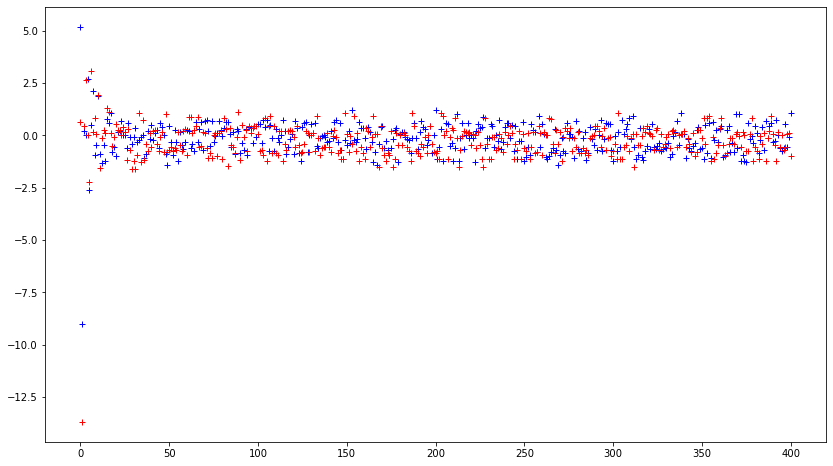

In [6]:
plt.figure(figsize=(14,8))
plt.plot(error, 'b+')
plt.plot(errorP, 'r+')